In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg


2023-11-11 18:12:28.671897: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-11 18:12:29.582522: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


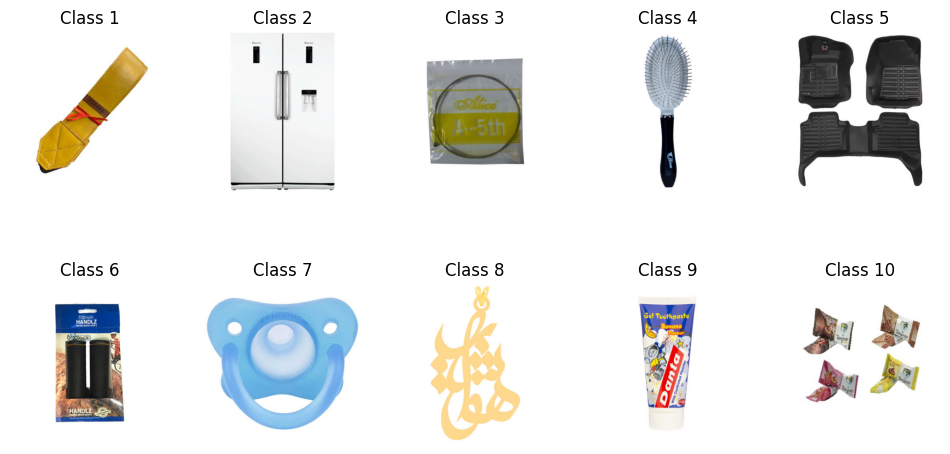

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
n = np.random.randint(0,700)
for i in range(1, 11):
    subdir = os.path.join(train_dir, str(i))
    pic_files = [f for f in os.listdir(subdir) if f.endswith('.jpg')]
    if pic_files:
        img = mpimg.imread(os.path.join(subdir, pic_files[n]))
        ax = axes[i - 1]
        ax.imshow(img)
        ax.set_title(f'Class {i}')
        ax.axis('off')

In [5]:
train_dir = 'train_data'
test_dir = 'test_data'

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.models import load_model

datagen = ImageDataGenerator(

    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=False,
    fill_mode='nearest',
    validation_split=0.0,
    preprocessing_function = preprocess_input

)

In [13]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(600, 600),
    batch_size=16,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# validation_generator = datagen.flow_from_directory(
#     train_dir,
#     target_size=(600, 600),
#     batch_size=16,
#     class_mode='categorical',
#     shuffle=False,
#     subset='validation'
# )

Found 9990 images belonging to 10 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = EfficientNetV2M(weights='imagenet', include_top=False, input_shape=(600, 600, 3))
for layer in base_model.layers[:-5]:
    layer.trainable = False

2023-11-11 18:14:15.174329: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10211 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6


214201816/214201816 [==============================] - 37s 0us/step


In [14]:
model = Sequential([
    base_model ,
    GlobalAveragePooling2D() ,
    Dense(256, activation='relu') ,
    Dense(10, activation='softmax')

])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
model.fit(
    train_generator,
    batch_size=16,
    epochs=10,
    )

Epoch 1/10
625/625 [==============================] - 581s 930ms/step - loss: 0.2621 - accuracy: 0.9127
Epoch 2/10
625/625 [==============================] - 579s 925ms/step - loss: 0.2444 - accuracy: 0.9184
Epoch 3/10
625/625 [==============================] - 582s 930ms/step - loss: 0.2156 - accuracy: 0.9245
Epoch 4/10
625/625 [==============================] - 585s 935ms/step - loss: 0.2095 - accuracy: 0.9237
Epoch 5/10
625/625 [==============================] - 580s 928ms/step - loss: 0.1912 - accuracy: 0.9342
Epoch 6/10
625/625 [==============================] - 579s 925ms/step - loss: 0.1856 - accuracy: 0.9373
Epoch 7/10
625/625 [==============================] - 577s 923ms/step - loss: 0.1655 - accuracy: 0.9439
Epoch 8/10
625/625 [==============================] - 577s 922ms/step - loss: 0.1511 - accuracy: 0.9490
Epoch 9/10
625/625 [==============================] - 578s 924ms/step - loss: 0.1533 - accuracy: 0.9478
Epoch 10/10
625/625 [==============================] - 578s 925m

In [18]:
model.save('EffV2-20Epoch-600-Trained100-16Batch.keras')

In [19]:
test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)
test_generator = test_datagen.flow_from_directory(
    'test_data',
    target_size=(600, 600),
    batch_size=1,  # Set batch_size to 1 for prediction on a single image at a time
    class_mode=None,  # Set to None since there are no labels
    shuffle=False  # Do not shuffle the data
    ,classes=['.']
)

Found 4000 images belonging to 1 classes.


In [20]:
predictions = model.predict(test_generator)

4000/4000 [==============================] - 159s 39ms/step


In [21]:
Final_predictions = np.argmax(predictions, axis=1)

In [22]:
df_predictions = pd.DataFrame({
    'name': [test_generator.filenames[i][2:] for i in range(len(test_generator.filenames))] ,
    'predicted': [Final_predictions[i]+1 for i in Final_predictions]
})
csv_filename = 'q1_submission_Final.csv'
df_predictions.to_csv(csv_filename, index=False)

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i in range(10):
    n = np.random.randint(0,400)
    pic_files = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]
    img = mpimg.imread(test_dir+"/"+pic_files[n])
    ax = axes[i]
    ax.set_title(f'Class {Final_predictions[n] + 1}')
    ax.imshow(img)
    ax.axis('off')


In [23]:
import pandas as pd
df = pd.read_csv('q1_submission.csv')
df

,name,predicted
0,0009e12a0edb16b231b73e501366209662a51363_16140...,8
1,00180e2358a45e3028e993b43e483eeee105e127_16284...,1
2,0037909953100cdd2c03a30084fa3876e5579212_16151...,1
3,006321aee302c253b9b4922138f879508d48f77e_16241...,8
4,0067178f7669828b3439d0888795b1f3225a7df2_16289...,8
...,...,...
3995,ffac0874d22903dadba619aea38393f77ce6cac6_16277...,1
3996,ffbe06e96778ca2a0a3f5c56961304bc2d6ddb49_16258...,1
3997,ffc3f6f05c6da8c4970334083f03d453f5cddfbb_16242...,8
3998,ffe163763cbd2674e940dcf77af1863174c59dc5_16304...,4
